In [19]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.transforms import Bbox
plt.rcParams['pdf.fonttype'] = 42

marker_style = dict(markersize=20, fillstyle='none', alpha=0.9, linestyle='none', markeredgewidth=4)
markers = [('o', 'DNSP-MCMC'), ('P', 'DNSP-UNSP'), ('*', 'DNSP-USAP'), ('', 'THP'), ('', 'SAHP'), ('', 'NHP'), ('', 'MTPP')]
ls_lst = ['-', '--', ':', (0, (3,10,1, 10)), (0, (3,1,1,1,1,1)), (0, (3,5,1,5,1,5)), (0, (5,10))]
colors_lst = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
line_width = 5

fill_between_alpha = 0.3

figheight=6.65
figwidth=6
# figbb = Bbox([[-1.175,-0.25],[figwidth,figheight]])
figbb = Bbox([[-1.275,-0.25],[figwidth,figheight]])
#savefigarg = {'bbox_inches': 'tight'}
savefigarg = {'bbox_inches': figbb}


# -----------------------------------------------------------------------
class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

# Format with 2 decimal places
# -----------------------------------------------------------------------

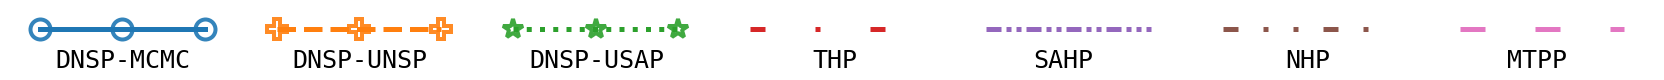

In [20]:
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D
plt.rcParams['pdf.fonttype'] = 42


text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=25, fontfamily='monospace')


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    # ax.set_xlim(-0.4, 2.4)
    ax.invert_yaxis()

fig, axs = plt.subplots(ncols=7, figsize=(23,1), layout='constrained')
# fig.suptitle('Un-filled markers', fontsize=14)
ids_lst = list(range(7))
for id, ax, marker, ls, color in zip(ids_lst, axs, markers, ls_lst, colors_lst):
    if id >= 0 and id <= 2:
        ax.text(1.83, 0.1, marker[1], **text_style)
    else:
        ax.text(1.3, 0.1, marker[1], **text_style)
    ax.plot([0] * 3, color=color, ls=ls, lw=line_width)
    ax.plot([0] * 3, marker=marker[0], **marker_style, color=color)
    format_axes(ax)

plt.savefig('legend.pdf',  bbox_inches='tight')
plt.savefig('legend.png',  bbox_inches='tight', dpi=300)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('legend.png').convert('CMYK').save('legend-cmyk.pdf')  

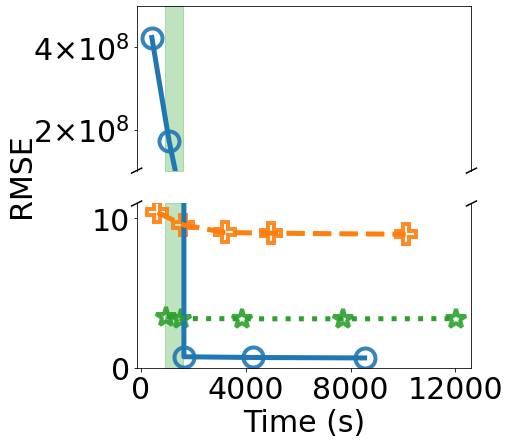

In [21]:

posterior_x = np.array([413.92, 1068.39, 1637.02, 4271.75, 8532.00])
posterior_y = np.array([4.24e8, 1.73e8, 0.74, 0.69, 0.66])

nsp_x = np.array([626.89, 1619, 3212, 4970, 10099])
nsp_y = np.array([10.40, 9.56, 9.06, 9.01, 8.94])

attn_x = np.array([972, 1517, 3862, 7726, 12028])
attn_y = np.array([3.43, 3.30, 3.28, 3.28, 3.29])

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC",marker=markers[0][0], **marker_style)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP", marker=markers[1][0], **marker_style)
ax.plot(attn_x, attn_y, label="DNSP-USAP", marker=markers[2][0], **marker_style)
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC",ls=ls_lst[0], color='C0', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP",ls=ls_lst[1], color='C1', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP",ls=ls_lst[2], color='C2', lw=line_width)

ax2.plot(posterior_x, posterior_y, marker=markers[0][0], **marker_style, color='C0')
ax2.plot(nsp_x, nsp_y, marker=markers[1][0], **marker_style, color='C1')
ax2.plot(attn_x, attn_y, marker=markers[2][0], **marker_style, color='C2')
ax2.plot(posterior_x, posterior_y, ls=ls_lst[0], color='C0', lw=line_width)
ax2.plot(nsp_x, nsp_y, ls=ls_lst[1], color='C1', lw=line_width)
ax2.plot(attn_x, attn_y, ls=ls_lst[2], color='C2', lw=line_width)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(1e8, 5e8)  # outliers only
ax2.set_ylim(0, 11.)  # most of the data



# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

# --------------------------------------------------------------------
# Format with 2 decimal places
ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# ----------------------------------------------------------------------
ax2.set_xlabel('Time (s)', fontsize=30)
ax.set_ylabel('RMSE', fontsize=30)
ax.yaxis.set_label_coords(-0.30, -0.025)
# ax.legend()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 4000))
ax.tick_params(axis='both', labelsize=30)
ax2.tick_params(axis='both', labelsize=30)

fill_y_ax2 = np.linspace(0,11,50)
ax2.fill_betweenx(fill_y_ax2, x1=900, x2=1600, alpha=fill_between_alpha,color='C2')
fill_y_ax1 = np.linspace(1e8, 5e8, 50)
ax.fill_betweenx(fill_y_ax1, x1=900, x2=1600, alpha=fill_between_alpha, color='C2')
# plt.show()
plt.savefig('2-hidden-synthetic-rmse.pdf',  **savefigarg)
plt.savefig('2-hidden-synthetic-rmse.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('2-hidden-synthetic-rmse.png').convert('CMYK').save('2-hidden-synthetic-rmse-cmyk.pdf')

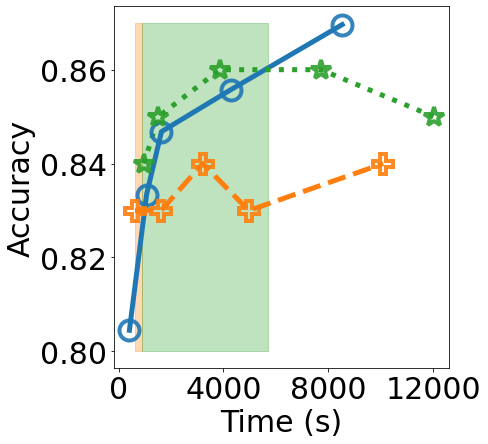

In [22]:


posterior_x = np.array([413.92, 1068.39, 1637.02, 4271.75, 8532.00])
posterior_y = np.array([0.8045, 0.8334, 0.8468, 0.8557, 0.8696])

nsp_x = np.array([626.89, 1619, 3212, 4970, 10099])
nsp_y = np.array([0.83, 0.83, 0.84, 0.83, 0.84])

attn_x = np.array([972, 1517, 3862, 7726, 12028])
attn_y = np.array([0.84, 0.85, 0.86, 0.86, 0.85])

f, ax = plt.subplots()
f.set_size_inches(figwidth,figheight)


# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC",ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP",ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP",ls=':', lw=line_width)

marker_style_id = 0
ax.plot(posterior_x, posterior_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(nsp_x, nsp_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(attn_x, attn_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])


# zoom-in / limit the view to different portions of the data
# --------------------------------------------------------------------
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ----------------------------------------------------------------------

# ----------------------------------------------------------------------
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Time (s)', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
# ax.legend()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 4000))

ax.fill_betweenx(y=np.linspace(0.80,0.87,50),x1=626,x2=900,color='C1',alpha=fill_between_alpha)
ax.fill_betweenx(y=np.linspace(0.80,0.87,50),x1=900,x2=5700,color='C2',alpha=fill_between_alpha)
# plt.show()
plt.savefig('2-hidden-synthetic-accuracy.pdf',  **savefigarg)
plt.savefig('2-hidden-synthetic-accuracy.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('2-hidden-synthetic-accuracy.png').convert('CMYK').save('2-hidden-synthetic-accuracy-cmyk.pdf')

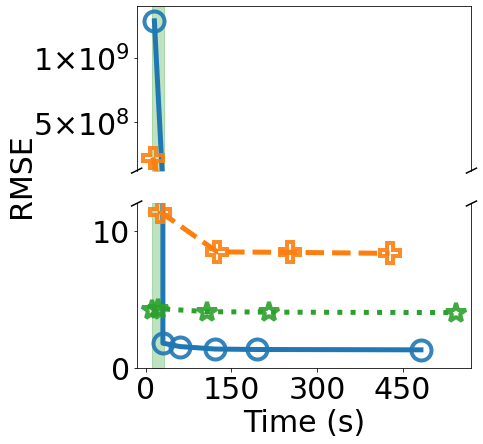

In [23]:
posterior_x = np.array([15.4, 30.32, 60.25, 121.5, 194.76, 482.05])
posterior_y = np.array([1.287e9, 1.8002, 1.5519, 1.3703, 1.3369, 1.3112])

nsp_x = np.array([12.7, 25.18, 125.5, 252.36, 427.18])
nsp_y = np.array([2.219e8, 11.406, 8.464, 8.432, 8.356])

attn_x = np.array([11.28, 22.34, 107.74, 216.82, 543.84])
attn_y = np.array([4.244, 4.322, 4.098, 4.065, 4.032])

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC",ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP",ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP",ls=':', lw=line_width)

ax2.plot(posterior_x, posterior_y,ls='-', lw=line_width)
ax2.plot(nsp_x, nsp_y,ls='--', lw=line_width)
ax2.plot(attn_x, attn_y,ls=':', lw=line_width)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(1.2e8, 1.4e9)  # outliers only
ax2.set_ylim(0, 12.)  # most of the data
marker_style_id = 0
ax.plot(np.ma.masked_where((1.2e8>posterior_y)|(posterior_y>1.4e9), posterior_x), 
        np.ma.masked_where((1.2e8>posterior_y)|(posterior_y>1.4e9), posterior_y), 
        marker=markers[marker_style_id][0], 
        **marker_style, 
        color=colors_lst[marker_style_id])
ax2.plot(np.ma.masked_where((0 > posterior_y) | (posterior_y > 12), posterior_x), 
         np.ma.masked_where((0 > posterior_y) | (posterior_y > 12), posterior_y), 
         marker=markers[marker_style_id][0], 
         **marker_style, 
         color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(np.ma.masked_where((1.2e8>nsp_y)|(nsp_y>1.4e9), nsp_x), 
        np.ma.masked_where((1.2e8>nsp_y)|(nsp_y>1.4e9), nsp_y), 
        marker=markers[marker_style_id][0], 
        **marker_style, 
        color=colors_lst[marker_style_id])
ax2.plot(np.ma.masked_where((0 > nsp_y) | (nsp_y > 12), nsp_x), 
         np.ma.masked_where((0 > nsp_y) | (nsp_y > 12), nsp_y), 
         marker=markers[marker_style_id][0], 
         **marker_style, 
         color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(np.ma.masked_where((1.2e8>attn_y)|(attn_y>1.4e9), attn_x), 
        np.ma.masked_where((1.2e8>attn_y)|(attn_y>1.4e9), attn_y), 
        marker=markers[marker_style_id][0], 
        **marker_style, 
        color=colors_lst[marker_style_id])
ax2.plot(np.ma.masked_where((0 > attn_y) | (attn_y > 12), attn_x), 
         np.ma.masked_where((0 > attn_y) | (attn_y > 12), attn_y), 
         marker=markers[marker_style_id][0], 
         **marker_style, 
         color=colors_lst[marker_style_id])


# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

# --------------------------------------------------------------------
# Format with 2 decimal places
ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# ----------------------------------------------------------------------
ax2.set_xlabel('Time (s)', fontsize=30)
ax.set_ylabel('RMSE', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
ax2.tick_params(axis='both', labelsize=30)
ax.yaxis.set_label_coords(-0.30, -0.025)
# ax.legend()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 150))

fill_y_ax2 = np.linspace(0,12,50)
ax2.fill_betweenx(fill_y_ax2, x1=11, x2=32, alpha=fill_between_alpha,color='C2')
fill_y_ax1 = np.linspace(1.2e8, 1.4e9, 50)
ax.fill_betweenx(fill_y_ax1, x1=11, x2=32, alpha=fill_between_alpha, color='C2')
# plt.show()
plt.savefig('1-hidden-synthetic-rmse.pdf',  **savefigarg)
plt.savefig('1-hidden-synthetic-rmse.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('1-hidden-synthetic-rmse.png').convert('CMYK').save('1-hidden-synthetic-rmse-cmyk.pdf')

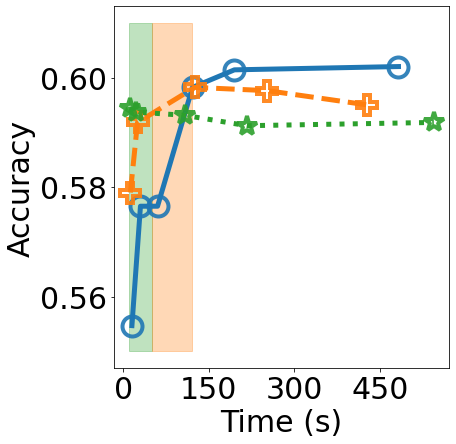

In [24]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.ticker as mticker


posterior_x = np.array([15.4, 30.32, 60.25, 121.5, 194.76, 482.05])
posterior_y = np.array([0.5547, 0.5765, 0.5765, 0.5982, 0.6014, 0.6020])

nsp_x = np.array([12.7, 25.18, 125.5, 252.36, 427.18])
nsp_y = np.array([0.5790, 0.5918, 0.5982, 0.5976, 0.5950])

attn_x = np.array([11.28, 22.34, 107.74, 216.82, 543.84])
attn_y = np.array([0.5944, 0.5937, 0.5931, 0.5912, 0.5918])

f, ax = plt.subplots()
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC",ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP",ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP",ls=':', lw=line_width)
marker_style_id = 0
ax.plot(posterior_x, posterior_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(nsp_x, nsp_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(attn_x, attn_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])

# zoom-in / limit the view to different portions of the data

# ----------------------------------------------------------------------
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Time (s)', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
# ax.legend()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 150))

ax.fill_betweenx(y=np.linspace(0.55,0.61,50),x1=11,x2=50,color='C2',alpha=fill_between_alpha)
ax.fill_betweenx(y=np.linspace(0.55,0.61,50),x1=50,x2=120,color='C1',alpha=fill_between_alpha)
# plt.show()
plt.savefig('1-hidden-synthetic-accuracy.pdf',  **savefigarg)
plt.savefig('1-hidden-synthetic-accuracy.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('1-hidden-synthetic-accuracy.png').convert('CMYK').save('1-hidden-synthetic-accuracy-cmyk.pdf')

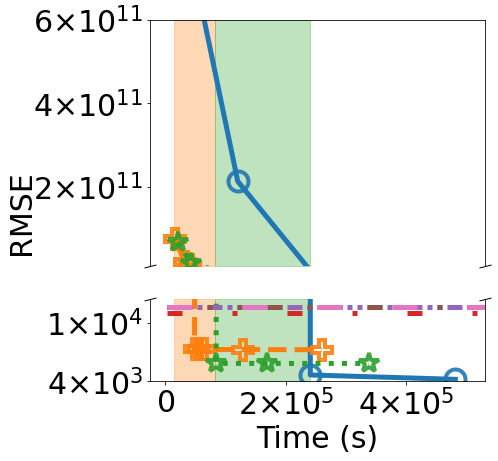

In [25]:

posterior_x = np.array([20, 40, 80, 160, 320, 640, 1280]) * 1.739e-3 * 216465
posterior_y = np.array([2.33e12, 1.7087e12, 1.1140e12, 6.3049e11, 2.133e11, 5.081e3, 4.3353e3])

nsp_x = np.array([200, 400, 500, 600, 700, 800, 1600, 3200]) * 3.749e-4 * 216465
nsp_y = np.array([7.640e10, 1.986e10, 1.376e10, 9.419e3, 9.421e3, 9.420e3, 9.411e3, 9.384e3])

attn_x = np.array([200, 400, 800, 1600, 3200]) * 4.881e-4 * 216465
attn_y = np.array([6.810e10, 1.796e10, 7.049e3, 7.046e3, 7.041e3])

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
f.set_size_inches(figwidth,figheight)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(1e10, 6e11)  # outliers only
ax2.set_ylim(4e3, 1.8e4)  # most of the data

# plot the same data on both axes
marker_style_id = 0
ax.plot(np.ma.masked_where((1e10>posterior_y) | (posterior_y>6e11),posterior_x), np.ma.masked_where((1e10>posterior_y) | (posterior_y>6e11), posterior_y),
        color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC", ls=ls_lst[marker_style_id], color=colors_lst[marker_style_id], lw=line_width)

marker_style_id += 1
ax.plot(np.ma.masked_where((1e10>nsp_y) | (nsp_y>6e11),nsp_x), np.ma.masked_where((1e10>nsp_y) | (nsp_y>6e11), nsp_y),
        color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP",ls=ls_lst[marker_style_id], color=colors_lst[marker_style_id], lw=line_width)

marker_style_id += 1
ax.plot(np.ma.masked_where((1e10>attn_y) | (attn_y>6e11),attn_x), np.ma.masked_where((1e10>attn_y) | (attn_y>6e11), attn_y),
        color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
ax.plot(attn_x, attn_y, label="DNSP-USAP",ls=ls_lst[marker_style_id], color=colors_lst[marker_style_id], lw=line_width)

ax.axhline(y=15630.7, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="THP", lw=line_width)
ax.axhline(y=16666.0, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), label="SAHP", lw=line_width)
ax.axhline(y=16644.7, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), label="NHP", lw=line_width)
ax.axhline(y=1.66404e4, xmin=0.05, color='C6', ls=(0, (5,10)), label="MTPP", lw=line_width)
# ax.axhline(y=16645, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="SOTA")

marker_style_id = 0
ax2.plot(posterior_x, posterior_y, ls=ls_lst[marker_style_id], color=colors_lst[marker_style_id], lw=line_width)
ax2.plot(np.ma.masked_where((4e3>posterior_y) | (posterior_y>1.8e4),posterior_x), np.ma.masked_where((4e3>posterior_y) | (posterior_y>1.8e4), posterior_y),
        color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)

marker_style_id += 1
ax2.plot(nsp_x, nsp_y,ls=ls_lst[marker_style_id], color=colors_lst[marker_style_id], lw=line_width)
ax2.plot(np.ma.masked_where((4e3>nsp_y) | (nsp_y>1.8e4),nsp_x), np.ma.masked_where((4e3>nsp_y) | (nsp_y>1.8e4), nsp_y),
        color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)

marker_style_id += 1
ax2.plot(attn_x, attn_y, ls=ls_lst[marker_style_id], color=colors_lst[marker_style_id], lw=line_width)
ax2.plot(np.ma.masked_where((4e3>attn_y) | (attn_y>1.8e4),attn_x), np.ma.masked_where((4e3>attn_y) | (attn_y>1.8e4), attn_y),
        color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)

marker_style_id += 1
ax2.axhline(y=15630.7, xmin=0.05, ls=ls_lst[marker_style_id], color=colors_lst[marker_style_id], lw=line_width)

marker_style_id += 1
ax2.axhline(y=16666.0, xmin=0.05, ls=ls_lst[marker_style_id], color=colors_lst[marker_style_id], lw=line_width)

marker_style_id += 1
ax2.axhline(y=16644.7, xmin=0.05, ls=ls_lst[marker_style_id], color=colors_lst[marker_style_id], lw=line_width)


marker_style_id += 1
ax2.axhline(y=1.66404e4, xmin=0.05, ls=ls_lst[marker_style_id], color=colors_lst[marker_style_id], lw=line_width)

marker_style_id = 3
ax2_xlim = ax2.get_xlim()
ax2.plot(np.arange(5) * (ax2_xlim[1]-0.05)/4, [15630.7] * 5, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax2.plot(np.arange(4) * (ax2_xlim[1]-0.05)/4 + 20000, [16666.0] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax2.plot(np.arange(4) * (ax2_xlim[1]-0.05)/4 + 40000, [16644.7] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax2.plot(np.arange(4) * (ax2_xlim[1]-0.05)/4 + 60000, [1.66404e4] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)



# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
# 
# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
d = .25  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

# --------------------------------------------------------------------
# Format with 2 decimal places
ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
ax2.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
ax2.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# ----------------------------------------------------------------------
ax2.set_xlabel('Time (s)', fontsize=30)
ax.set_ylabel('RMSE', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
ax2.tick_params(axis='both', labelsize=30)
ax.yaxis.set_label_coords(-0.34, 0.22)


# ax.legend()
start, end = ax.get_xlim()
y_start, y_end = ax2.get_ylim()
ax.xaxis.set_ticks(np.arange(0, end, 200000))
ax2.yaxis.set_ticks(np.arange(y_start, y_end, 10000))

fill_y_ax2 = np.linspace(4e3,1.8e4,50)
ax2.fill_betweenx(fill_y_ax2, x1=15000, x2=83000, alpha=fill_between_alpha,color='C1')
fill_y_ax1 = np.linspace(1e10, 6e11, 50)
ax.fill_betweenx(fill_y_ax1, x1=15000, x2=83000, alpha=fill_between_alpha, color='C1')
fill_y_ax2 = np.linspace(4e3,1.8e4,50)
ax2.fill_betweenx(fill_y_ax2, x1=83000, x2=240000, alpha=fill_between_alpha,color='C2')
fill_y_ax1 = np.linspace(1e10, 6e11, 50)
ax.fill_betweenx(fill_y_ax1, x1=83000, x2=240000, alpha=fill_between_alpha, color='C2')

# plt.show()
plt.savefig('1-hidden-retweet-rmse.pdf',  **savefigarg)
plt.savefig('1-hidden-retweet-rmse.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('1-hidden-retweet-rmse.png').convert('CMYK').save('1-hidden-retweet-rmse-cmyk.pdf')

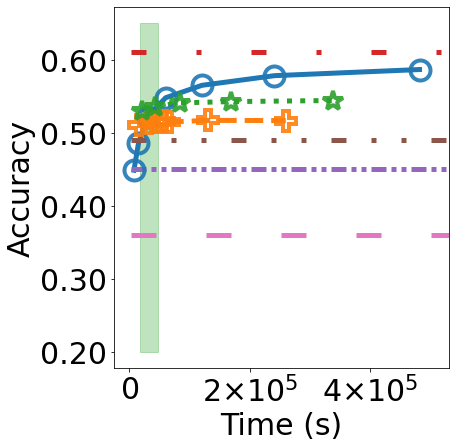

In [26]:
posterior_x = np.array([20, 40, 80, 160, 320, 640, 1280]) * 1.739e-3 * 216465
posterior_y = np.array([0.4487, 0.4858, 0.5221, 0.5480, 0.5650, 0.5782, 0.5866])

nsp_x = np.array([200, 400, 500, 600, 700, 800, 1600, 3200]) * 3.749e-4 * 216465
nsp_y = np.array([0.5100, 0.5134, 0.5144, 0.5144, 0.5155, 0.5147, 0.5170, 0.5167])

attn_x = np.array([200, 400, 800, 1600, 3200]) * 4.881e-4 * 216465
attn_y = np.array([0.5304, 0.5359, 0.5410, 0.5427, 0.5442])

f, ax = plt.subplots()
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC", ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP", ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP", ls=":", lw=line_width)
# ax.axhline(y=0.6, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="SOTA")
ax.axhline(y=0.61, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="THP", lw=line_width)
ax.axhline(y=0.45, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), label="SAHP", lw=line_width)
ax.axhline(y=0.49, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), label="NHP", lw=line_width)
ax.axhline(y=0.36, xmin=0.05, color='C6', ls=(0, (5,10)), label="MTPP", lw=line_width)

marker_style_id = 0
ax.plot(posterior_x, posterior_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(nsp_x, nsp_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(attn_x, attn_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax_xlim = ax.get_xlim()
ax.plot(np.arange(5) * (ax_xlim[1]-0.05)/4, [0.61] * 5, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 20000, [0.45] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 40000, [0.49] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 60000, [0.36] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)

# zoom-in / limit the view to different portions of the data
# --------------------------------------------------------------------
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# ----------------------------------------------------------------------

# ----------------------------------------------------------------------
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Time (s)', fontsize=30)
# ax.legend()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 200000))
ax.tick_params(axis='both', labelsize=30)

ax.fill_betweenx(y=np.linspace(0.2,0.65,50),x1=18000,x2=47000,color='C2',alpha=fill_between_alpha)

# plt.show()
plt.savefig('1-hidden-retweet-accuracy.pdf',  **savefigarg)
plt.savefig('1-hidden-retweet-accuracy.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('1-hidden-retweet-accuracy.png').convert('CMYK').save('1-hidden-retweet-accuracy-cmyk.pdf')

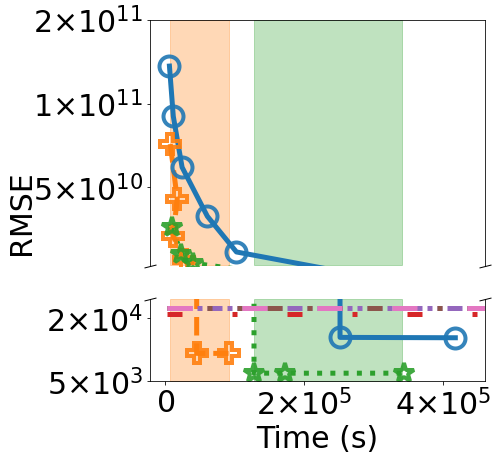

In [27]:

posterior_x = np.array([6036.62, 11562.43, 24224.28, 60607.29, 102441.76, 251454.44, 417333])
posterior_y = np.array([1.224e11, 9.249e10, 6.207e10, 3.281e10, 1.154e10, 1.195e4, 1.189e4])

nsp_x = np.array([7206.49, 17253.27, 11333.49, 26719.02, 45204.21, 91013.17])
nsp_y = np.array([7.588e10, 4.324e10, 2.115e10, 6.640e9, 9.416e3, 9.419e3])

attn_x = np.array([10216.03, 22349.39, 40545.07, 127675.10, 172251.86, 343165])
attn_y = np.array([2.672e10, 1.055e10, 4.792e9, 6.294e3, 6.2803e3, 6.287e3])

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC",ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP",ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP",ls=":", lw=line_width)
ax.axhline(y=15630.7, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="THP", lw=line_width)
ax.axhline(y=16666.0, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), label="SAHP", lw=line_width)
ax.axhline(y=16644.7, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), label="NHP", lw=line_width)
ax.axhline(y=1.66404e4, xmin=0.05, color='C6', ls=(0, (5,10)), label="MTPP", lw=line_width)
# ax.axhline(y=16645, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="SOTA")

ax2.plot(posterior_x, posterior_y, ls='-', lw=line_width)
ax2.plot(nsp_x, nsp_y, ls='--', lw=line_width)
ax2.plot(attn_x, attn_y, ls=':', lw=line_width)
ax2.axhline(y=15630.7, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), lw=line_width)
ax2.axhline(y=16666.0, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), lw=line_width)
ax2.axhline(y=16644.7, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), lw=line_width)
ax2.axhline(y=1.66404e4, xmin=0.05, color='C6', ls=(0, (5,10)), lw=line_width)
# ax2.axhline(y=16645, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)))
# zoom-in / limit the view to different portions of the data
ax.set_ylim(3e9,1.5e11)  # outliers only
ax2.set_ylim(5e3, 1.8e4)  # most of the data

marker_style_id = 0
ax.plot(np.ma.masked_where((3e9>posterior_y) | (posterior_y>1.5e11), posterior_x), 
        np.ma.masked_where((3e9>posterior_y) | (posterior_y>1.5e11), posterior_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)
ax2.plot(np.ma.masked_where((5e3>posterior_y) | (posterior_y>1.8e4), posterior_x), 
        np.ma.masked_where((5e3>posterior_y) | (posterior_y>1.8e4), posterior_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)

marker_style_id += 1
ax.plot(np.ma.masked_where((3e9>nsp_y) | (nsp_y>1.5e11), nsp_x), 
        np.ma.masked_where((3e9>nsp_y) | (nsp_y>1.5e11), nsp_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)
ax2.plot(np.ma.masked_where((5e3>nsp_y) | (nsp_y>1.8e4), nsp_x), 
        np.ma.masked_where((5e3>nsp_y) | (nsp_y>1.8e4), nsp_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)

marker_style_id += 1
ax.plot(np.ma.masked_where((3e9>attn_y) | (attn_y>1.5e11), attn_x), 
        np.ma.masked_where((3e9>attn_y) | (attn_y>1.5e11), attn_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)
ax2.plot(np.ma.masked_where((5e3>attn_y) | (attn_y>1.8e4), attn_x), 
        np.ma.masked_where((5e3>attn_y) | (attn_y>1.8e4), attn_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)

marker_style_id += 1
ax2_xlim = ax2.get_xlim()
ax2.plot(np.arange(5) * (ax2_xlim[1]-0.05)/4, [15630.7] * 5, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax2.plot(np.arange(4) * (ax2_xlim[1]-0.05)/4 + 20000, [16666.0] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax2.plot(np.arange(4) * (ax2_xlim[1]-0.05)/4 + 40000, [16644.7] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax2.plot(np.arange(4) * (ax2_xlim[1]-0.05)/4 + 60000, [1.66404e4] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)


# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
# 
# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
d = .25  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

# --------------------------------------------------------------------
# Format with 2 decimal places
ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
ax2.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
ax2.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# ----------------------------------------------------------------------
ax2.set_xlabel('Time (s)', fontsize=30)
ax.set_ylabel('RMSE', fontsize=30)
ax.yaxis.set_label_coords(-0.34, 0.22)
# ax.legend()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 200000))
ax2.yaxis.set_ticks(np.arange(ax2.get_ylim()[0], ax2.get_ylim()[1], 10000))
ax.tick_params(axis='both', labelsize=30)
ax2.tick_params(axis='both', labelsize=30)

fill_y_ax2 = np.linspace(5e3,1.8e4,50)
ax2.fill_betweenx(fill_y_ax2, x1=7206, x2=91000, alpha=fill_between_alpha,color='C1')
fill_y_ax1 = np.linspace(4e9, 1.5e11, 50)
ax.fill_betweenx(fill_y_ax1, x1=7206, x2=91000, alpha=fill_between_alpha, color='C1')
fill_y_ax2 = np.linspace(5e3,1.8e4,50)
ax2.fill_betweenx(fill_y_ax2, x1=128013, x2=340000, alpha=fill_between_alpha,color='C2')
fill_y_ax1 = np.linspace(4e9, 1.5e11, 50)
ax.fill_betweenx(fill_y_ax1, x1=128013, x2=340000, alpha=fill_between_alpha, color='C2')

# plt.show()
plt.savefig('2-hidden-retweet-rmse.pdf',  **savefigarg)
plt.savefig('2-hidden-retweet-rmse.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('2-hidden-retweet-rmse.png').convert('CMYK').save('2-hidden-retweet-rmse-cmyk.pdf')

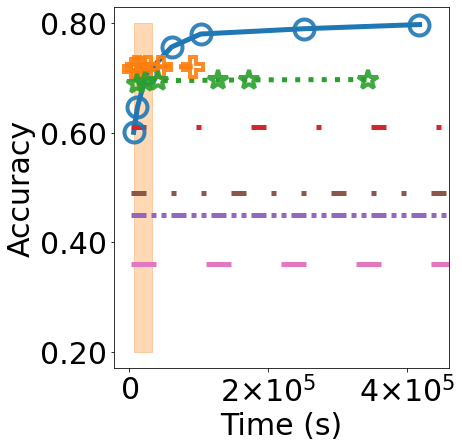

In [28]:

posterior_x = np.array([6036.62, 11562.43, 24224.28, 60607.29, 102441.76, 251454.44, 417333])
posterior_y = np.array([0.6008, 0.6466, 0.7071, 0.7566, 0.7803, 0.7900, 0.7976])

nsp_x = np.array([7206.49, 17253.27, 11333.49, 26719.02, 45204.21, 91013.17])
nsp_y = np.array([0.7158, 0.7177, 0.7195, 0.7199, 0.7206, 0.7206])

attn_x = np.array([10216.03, 22349.39, 40545.07, 127675.10, 172251.86, 343165])
attn_y = np.array([0.6892, 0.6928, 0.6949, 0.6961, 0.6966, 0.6972])

f, ax = plt.subplots()
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC", ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP", ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP", ls=":", lw=line_width)
ax.axhline(y=0.61, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="THP", lw=line_width)
ax.axhline(y=0.45, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), label="SAHP", lw=line_width)
ax.axhline(y=0.49, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), label="NHP", lw=line_width)
ax.axhline(y=0.36, xmin=0.05, color='C6', ls=(0, (5,10)), label="MTPP", lw=line_width)

marker_style_id = 0
ax.plot(posterior_x, posterior_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(nsp_x, nsp_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(attn_x, attn_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax_xlim = ax.get_xlim()
ax.plot(np.arange(5) * (ax_xlim[1]-0.05)/4, [0.61] * 5, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 20000, [0.45] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 40000, [0.49] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 60000, [0.36] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
# zoom-in / limit the view to different portions of the data
# --------------------------------------------------------------------
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ----------------------------------------------------------------------

# ----------------------------------------------------------------------
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Time (s)', fontsize=30)
# ax.legend()
ax.fill_betweenx(y=np.linspace(0.2,0.8,50),x1=7206,x2=32000,color='C1',alpha=fill_between_alpha)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 200000))
ax.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
ax.tick_params(axis='both', labelsize=30)

# plt.show()
plt.savefig('2-hidden-retweet-accuracy.pdf',  **savefigarg)
plt.savefig('2-hidden-retweet-accuracy.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('2-hidden-retweet-accuracy.png').convert('CMYK').save('2-hidden-retweet-accuracy-cmyk.pdf')


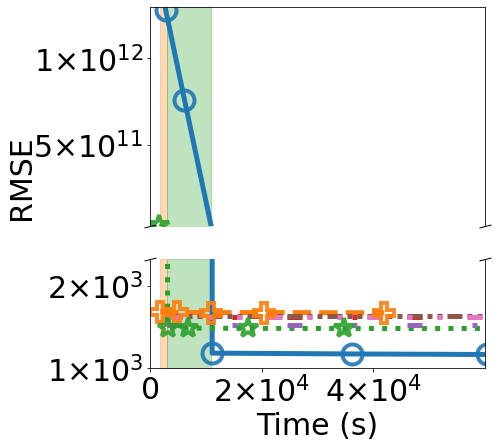

In [29]:
posterior_x = np.array([2803.6, 6163.2, 11133.3, 36208.5, 60373.6])
posterior_y = np.array([1.282e12, 7.616e11, 1.277e3, 1.262e3, 1.252e3])

nsp_x = np.array([1822.3, 4743.6, 10870.3, 20476.4, 41993.4])
nsp_y = np.array([2.028e3, 2.022e3, 2.016e3, 2.018e3, 2.013e3])

attn_x = np.array([1581.3, 3136.6, 6802.4, 17628.6, 34820.9, 74662.8])
attn_y = np.array([3.172e10, 1.743e3, 1.734e3, 1.729e3, 1.727e3, 1.727e3])

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC",ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP",ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP",ls=":", lw=line_width)
ax.axhline(y=1932.6, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="THP", lw=line_width)
ax.axhline(y=1786.8, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), label="SAHP", lw=line_width)
ax.axhline(y=1949.8, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), label="NHP", lw=line_width)
ax.axhline(y=1932.0, xmin=0.05, color='C6', ls=(0, (5,10)), label="MTPP", lw=line_width)
# ax.axhline(y=16645, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="SOTA")

ax2.plot(posterior_x, posterior_y, ls='-', lw=line_width)
ax2.plot(nsp_x, nsp_y, ls='--', lw=line_width)
ax2.plot(attn_x, attn_y, ls=':', lw=line_width)
ax2.axhline(y=1932.6, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), lw=line_width)
ax2.axhline(y=1786.8, xmin=0.05, color='C4', ls=(0, (3,10,1, 10)), lw=line_width)
ax2.axhline(y=1949.8, xmin=0.05, color='C5', ls=(0, (3,1,1,1,1,1)), lw=line_width)
ax2.axhline(y=1932.0, xmin=0.05, color='C6', ls=(0, (3,5,1,5,1,5)), lw=line_width)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(2.8e10, 13e11)  # outliers only
ax2.set_ylim(1e3, 3e3)  # most of the data
ax.set_xlim(0, 60000)
ax2.set_xlim(0, 60000)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 7000))

marker_style_id = 0
ax.plot(np.ma.masked_where((1e10>posterior_y) | (posterior_y>13e11), posterior_x), 
        np.ma.masked_where((1e10>posterior_y) | (posterior_y>13e11), posterior_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)
ax2.plot(np.ma.masked_where((1e3>posterior_y) | (posterior_y>3e3), posterior_x), 
        np.ma.masked_where((1e3>posterior_y) | (posterior_y>3e3), posterior_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)

marker_style_id += 1
ax.plot(np.ma.masked_where((1e10>nsp_y) | (nsp_y>13e11), nsp_x), 
        np.ma.masked_where((1e10>nsp_y) | (nsp_y>13e11), nsp_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)
ax2.plot(np.ma.masked_where((1e3>nsp_y) | (nsp_y>3e3), nsp_x), 
        np.ma.masked_where((1e3>nsp_y) | (nsp_y>3e3), nsp_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)

marker_style_id += 1
ax.plot(np.ma.masked_where((1e10>attn_y) | (attn_y>13e11), attn_x), 
        np.ma.masked_where((1e10>attn_y) | (attn_y>13e11), attn_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)
ax2.plot(np.ma.masked_where((1e3>attn_y) | (attn_y>3e3), attn_x), 
        np.ma.masked_where((1e3>attn_y) | (attn_y>3e3), attn_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)

marker_style_id += 1
ax2_xlim = ax2.get_xlim()
ax2.plot(np.arange(5) * (ax2_xlim[1]-0.05)/4 + 2000, [1932.6] * 5, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax2.plot(np.arange(4) * (ax2_xlim[1]-0.05)/4 + 20000 + 2000, [1786.8] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax2.plot(np.arange(4) * (ax2_xlim[1]-0.05)/4 + 40000 + 2000, [1949.8] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax2.plot(np.arange(4) * (ax2_xlim[1]-0.05)/4 + 60000 + 2000, [1932.0] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)



# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
# 
# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
d = .25  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

# --------------------------------------------------------------------
# Format with 2 decimal places
ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
ax2.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
ax2.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# ----------------------------------------------------------------------
# ----------------------------------------------------------------------
ax2.set_xlabel('Time (s)', fontsize=30)
ax.set_ylabel('RMSE', fontsize=30)
ax.yaxis.set_label_coords(-0.34, 0.22)
# ax.legend()

fill_y_ax2 = np.linspace(1e3,3e3,50)
ax2.fill_betweenx(fill_y_ax2, x1=1800, x2=3000, alpha=fill_between_alpha,color='C1')
fill_y_ax1 = np.linspace(2e10, 13e11, 50)
ax.fill_betweenx(fill_y_ax1, x1=1800, x2=3000, alpha=fill_between_alpha, color='C1')
fill_y_ax2 = np.linspace(1e3,3e3,50)
ax2.fill_betweenx(fill_y_ax2, x1=3000, x2=11000, alpha=fill_between_alpha,color='C2')
fill_y_ax1 = np.linspace(2e10, 13e11, 50)
ax.fill_betweenx(fill_y_ax1, x1=3000, x2=11000, alpha=fill_between_alpha, color='C2')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 20000))
# start, end = ax.get_xlim()
ax2.yaxis.set_ticks(np.arange(ax2.get_ylim()[0], ax2.get_ylim()[1], 1500))
ax.tick_params(axis='both', labelsize=30)
ax2.tick_params(axis='both', labelsize=30)

# plt.show()
plt.savefig('1-hidden-earthquake-rmse.pdf',  **savefigarg)
plt.savefig('1-hidden-earthquake-rmse.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('1-hidden-earthquake-rmse.png').convert('CMYK').save('1-hidden-earthquake-rmse-cmyk.pdf')

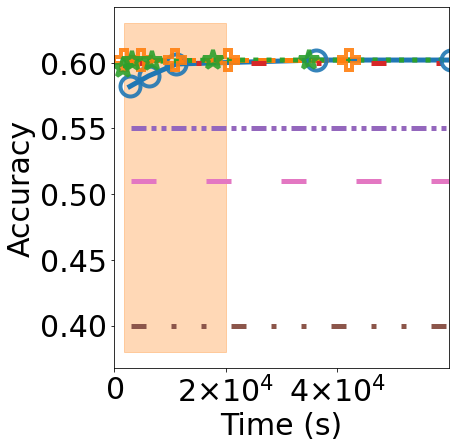

In [30]:


posterior_x = np.array([2803.6, 6163.2, 11133.3, 36208.5, 60373.6])
posterior_y = np.array([0.5819, 0.5899, 0.5990, 0.602, 0.602])

nsp_x = np.array([1822.3, 4743.6, 10870.3, 20476.4, 41993.4])
nsp_y = np.array([0.602, 0.602, 0.602, 0.602, 0.602])

attn_x = np.array([1581.3, 3136.6, 6802.4, 17628.6, 34820.9, 74662.8])
attn_y = np.array([0.596, 0.601, 0.601, 0.602, 0.602, 0.602])

f, ax = plt.subplots()
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC", ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP", ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP", ls=":", lw=line_width)
# ax.axhline(y=0.6, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="SOTA")
ax.axhline(y=0.60, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="THP", lw=line_width)
ax.axhline(y=0.55, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), label="SAHP", lw=line_width)
ax.axhline(y=0.40, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), label="NHP", lw=line_width)
ax.axhline(y=0.51, xmin=0.05, color='C6', ls=(0, (5,10)), label="MTPP", lw=line_width)

marker_style_id = 0
ax.plot(posterior_x, posterior_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(nsp_x, nsp_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(attn_x, attn_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax_xlim = ax.get_xlim()
ax.plot(np.arange(5) * (ax_xlim[1]-0.05)/4 + 2000, [0.60] * 5, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 4000, [0.55] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 6000, [0.40] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 8000, [0.51] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
# zoom-in / limit the view to different portions of the data
# --------------------------------------------------------------------
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# ----------------------------------------------------------------------

# ----------------------------------------------------------------------
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Time (s)', fontsize=30)
ax.set_xlim(0, 60000)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 20000))
ax.tick_params(axis='both', labelsize=30)
# ax.legend()
ax.fill_betweenx(y=np.linspace(0.38,0.63,50),x1=1800,x2=20000,color='C1',alpha=fill_between_alpha)

# plt.show()
plt.savefig('1-hidden-earthquake-accuracy.pdf',  **savefigarg)
plt.savefig('1-hidden-earthquake-accuracy.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('1-hidden-earthquake-accuracy.png').convert('CMYK').save('1-hidden-earthquake-accuracy-cmyk.pdf')

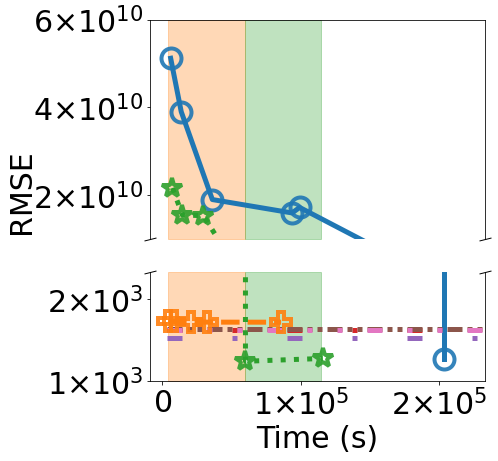

In [31]:


posterior_x = np.array([5923.6, 13558.7, 36065, 93753.7, 99186.6, 203551.2])
posterior_y = np.array([5.122e10, 3.903e10, 1.898e10, 1.592e10, 1.718e10, 1.416e3])

nsp_x = np.array([4070, 8163.2, 20934.1, 32363.1, 85772.1])
nsp_y = np.array([2.099e3, 2.092e3, 2.090e3, 2.080e3, 2.079e3])

attn_x = np.array([7199.75, 14439.4, 29520.5, 60007.4, 116016.96])
attn_y = np.array([2.163e10, 1.541e10, 1.533e10, 1.366e3, 1.417e3])

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC",ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP",ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP",ls=":", lw=line_width)
ax.axhline(y=1932.6, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="THP", lw=line_width)
ax.axhline(y=1786.8, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), label="SAHP", lw=line_width)
ax.axhline(y=1949.8, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), label="NHP", lw=line_width)
ax.axhline(y=1932.0, xmin=0.05, color='C6', ls=(0, (5,10)), label="MTPP", lw=line_width)
# ax.axhline(y=16645, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="SOTA")

ax2.plot(posterior_x, posterior_y, ls='-', lw=line_width)
ax2.plot(nsp_x, nsp_y, ls='--', lw=line_width)
ax2.plot(attn_x, attn_y, ls=':', lw=line_width)
ax2.axhline(y=1932.6, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), lw=line_width)
ax2.axhline(y=1786.8, xmin=0.05, color='C4', ls=(0, (3,10,1, 10)), lw=line_width)
ax2.axhline(y=1949.8, xmin=0.05, color='C5', ls=(0, (3,1,1,1,1,1)), lw=line_width)
ax2.axhline(y=1932.0, xmin=0.05, color='C6', ls=(0, (3,5,1,5,1,5)), lw=line_width)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(1e10, 6e10)  # outliers only
ax2.set_ylim(1e3, 3e3)  # most of the data
# ax.set_xlim(0, 30000)
# ax2.set_xlim(0, 30000)

marker_style_id = 0
ax.plot(np.ma.masked_where((1e10>posterior_y) | (posterior_y>6e10), posterior_x), 
        np.ma.masked_where((1e10>posterior_y) | (posterior_y>6e10), posterior_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)
ax2.plot(np.ma.masked_where((1e3>posterior_y) | (posterior_y>3e3), posterior_x), 
        np.ma.masked_where((1e3>posterior_y) | (posterior_y>3e3), posterior_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)

marker_style_id += 1
ax.plot(np.ma.masked_where((1e10>nsp_y) | (nsp_y>6e10), nsp_x), 
        np.ma.masked_where((1e10>nsp_y) | (nsp_y>6e10), nsp_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)
ax2.plot(np.ma.masked_where((1e3>nsp_y) | (nsp_y>3e3), nsp_x), 
        np.ma.masked_where((1e3>nsp_y) | (nsp_y>3e3), nsp_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)

marker_style_id += 1
ax.plot(np.ma.masked_where((1e10>attn_y) | (attn_y>6e10), attn_x), 
        np.ma.masked_where((1e10>attn_y) | (attn_y>6e10), attn_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)
ax2.plot(np.ma.masked_where((1e3>attn_y) | (attn_y>3e3), attn_x), 
        np.ma.masked_where((1e3>attn_y) | (attn_y>3e3), attn_y), 
        color=colors_lst[marker_style_id], 
        marker=markers[marker_style_id][0], 
        **marker_style)

marker_style_id += 1
ax2_xlim = ax2.get_xlim()
ax2.plot(np.arange(5) * (ax2_xlim[1]-0.05)/4 + 2000, [1932.6] * 5, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax2.plot(np.arange(4) * (ax2_xlim[1]-0.05)/4 + 20000 + 2000, [1786.8] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax2.plot(np.arange(4) * (ax2_xlim[1]-0.05)/4 + 40000 + 2000, [1949.8] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax2.plot(np.arange(4) * (ax2_xlim[1]-0.05)/4 + 60000 + 2000, [1932.0] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
# -----------------------------------------------------------------------

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
# 
# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
d = .25  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

# --------------------------------------------------------------------
# Format with 2 decimal places
ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
ax2.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
ax2.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# ----------------------------------------------------------------------
ax2.set_xlabel('Time (s)', fontsize=30)
ax.set_ylabel('RMSE', fontsize=30)
ax.yaxis.set_label_coords(-0.34, 0.22)
# ax.legend()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 50000))

fill_y_ax2 = np.linspace(1e3,3e3,50)
ax2.fill_betweenx(fill_y_ax2, x1=4070, x2=60000, alpha=fill_between_alpha,color='C1')
fill_y_ax1 = np.linspace(1e10, 6e10, 50)
ax.fill_betweenx(fill_y_ax1, x1=4070, x2=60000, alpha=fill_between_alpha, color='C1')
fill_y_ax2 = np.linspace(1e3,3e3,50)
ax2.fill_betweenx(fill_y_ax2, x1=60000, x2=115000, alpha=fill_between_alpha,color='C2')
fill_y_ax1 = np.linspace(1e10, 6e10, 50)
ax.fill_betweenx(fill_y_ax1, x1=60000, x2=115000, alpha=fill_between_alpha, color='C2')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 100000))
ax2.yaxis.set_ticks(np.arange(ax2.get_ylim()[0], ax2.get_ylim()[1], 1.5e3))
ax.tick_params(axis='both', labelsize=30)
ax2.tick_params(axis='both', labelsize=30)

# plt.show()
plt.savefig('2-hidden-earthquake-rmse.pdf',  **savefigarg)
plt.savefig('2-hidden-earthquake-rmse.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('2-hidden-earthquake-rmse.png').convert('CMYK').save('2-hidden-earthquake-rmse-cmyk.pdf')

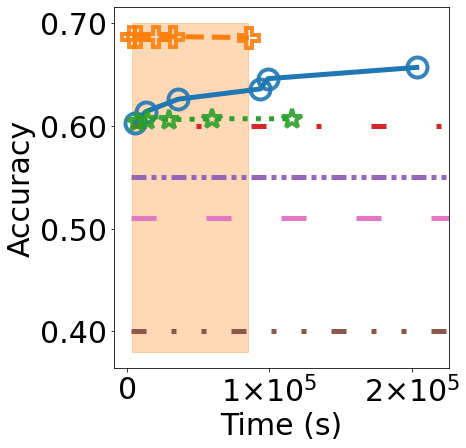

In [32]:


posterior_x = np.array([5923.6, 13558.7, 36065, 93753.7, 99186.6, 203551.2])
posterior_y = np.array([0.603, 0.614, 0.626, 0.636, 0.646, 0.657])

nsp_x = np.array([4070, 8163.2, 20934.1, 32363.1, 85772.1])
nsp_y = np.array([0.687, 0.687, 0.687, 0.687, 0.686])

attn_x = np.array([7199.75, 14439.4, 29520.5, 60007.4, 116016.96])
attn_y = np.array([0.604, 0.606, 0.606,0.607, 0.607])
f, ax = plt.subplots()
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC", ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP", ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP", ls=":", lw=line_width)
# ax.axhline(y=0.6, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="SOTA")
ax.axhline(y=0.60, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="THP", lw=line_width)
ax.axhline(y=0.55, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), label="SAHP", lw=line_width)
ax.axhline(y=0.40, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), label="NHP", lw=line_width)
ax.axhline(y=0.51, xmin=0.05, color='C6', ls=(0, (5,10)), label="MTPP", lw=line_width)

marker_style_id = 0
ax.plot(posterior_x, posterior_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(nsp_x, nsp_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(attn_x, attn_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax_xlim = ax.get_xlim()
ax.plot(np.arange(5) * (ax_xlim[1]-0.05)/4 + 2000, [0.60] * 5, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 2000, [0.55] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 4000, [0.40] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 6000, [0.51] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
# zoom-in / limit the view to different portions of the data
# --------------------------------------------------------------------
# Format with 2 decimal places
ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
ax.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))

# ----------------------------------------------------------------------
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Time (s)', fontsize=30)
# ax.set_xlim(, 60000)
ax.fill_betweenx(y=np.linspace(0.38,0.7,50),x1=4000,x2=85000,color='C1',alpha=fill_between_alpha)
# ax.legend()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 100000))
ax.tick_params(axis='both', labelsize=30)

# plt.show()
plt.savefig('2-hidden-earthquake-accuracy.pdf',  **savefigarg)
plt.savefig('2-hidden-earthquake-accuracy.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('2-hidden-earthquake-accuracy.png').convert('CMYK').save('2-hidden-earthquake-accuracy-cmyk.pdf')

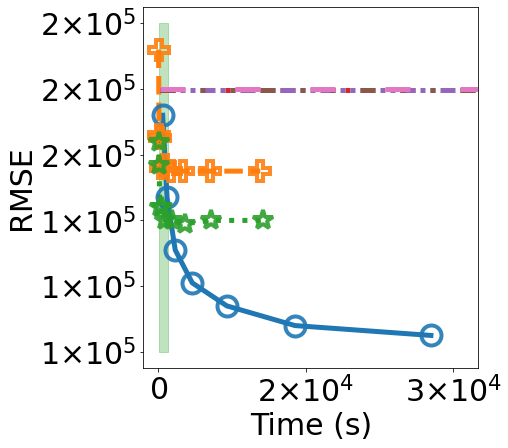

In [33]:


posterior_x = np.array([482.2, 960.0, 1846.9, 3689.7, 7436.0, 14837.9, 29573.8])
posterior_y = np.array([1.72e5, 1.47e5, 1.31e5, 1.21e5, 1.14e5, 1.08e5, 1.05e5])

nsp_x = np.array([44, 84.1, 167.2, 351.5, 683.3, 1374.2, 2722.5, 5628.8, 11067.4])
nsp_y = np.array([1.92e5, 1.66e5, 1.65e5, 1.56e5, 1.57e5, 1.55e5, 1.55e5, 1.55e5, 1.55e5])

attn_x = np.array([47.9, 93.2, 175.7, 370.6, 754.7, 1462.1, 2886.1, 5706.0, 11315.7])
attn_y = np.array([1.64e5, 1.57e5, 1.44e5, 1.44e5, 1.40e5, 1.40e5, 1.39e5, 1.40e5, 1.40e5])
f, ax = plt.subplots()
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC", ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP", ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP", ls=":", lw=line_width)
# ax.axhline(y=0.6, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="SOTA")
ax.axhline(y=179759.4, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="THP", lw=line_width)
ax.axhline(y=179761.6, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), label="SAHP", lw=line_width)
ax.axhline(y=179773.3, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), label="NHP", lw=line_width)
ax.axhline(y=1.79958e5, xmin=0.05, color='C6', ls=(0, (5,10)), label="MTPP", lw=line_width)

marker_style_id = 0
ax.plot(posterior_x, posterior_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(nsp_x, nsp_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(attn_x, attn_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax_xlim = ax.get_xlim()
ax.plot(np.arange(5) * (ax_xlim[1]-0.05)/4 + 2000, [179759.4] * 5, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 4000, [179761.6] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 6000, [179773.3] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 8000, [1.79958e5] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
# zoom-in / limit the view to different portions of the data
# --------------------------------------------------------------------
ax.yaxis.set_major_formatter(MathTextSciFormatter('%1.0e'))
ax.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# ----------------------------------------------------------------------

# ----------------------------------------------------------------------
ax.set_ylabel('RMSE', fontsize=30)
ax.set_xlabel('Time (s)', fontsize=30)
# ax.set_xlim(, 60000)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 16000))
ax.tick_params(axis='both', labelsize=30)
ax.fill_betweenx(y=np.linspace(1e5,2e5,50),x1=44,x2=1100,color='C2',alpha=fill_between_alpha)
# ax.legend()

# plt.show()
plt.savefig('1-hidden-homicide-rmse.pdf',  **savefigarg)
plt.savefig('1-hidden-homicide-rmse.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('1-hidden-homicide-rmse.png').convert('CMYK').save('1-hidden-homicide-rmse-cmyk.pdf')


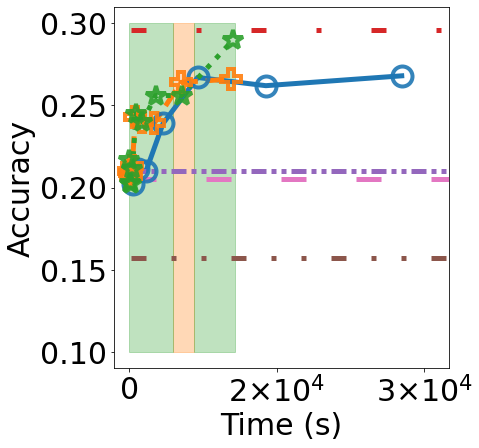

In [34]:


posterior_x = np.array([482.2, 960.0, 1846.9, 3689.7, 7436.0, 14837.9, 29573.8])
posterior_y = np.array([0.202, 0.211, 0.210, 0.239, 0.267, 0.262, 0.268])

nsp_x = np.array([44, 84.1, 167.2, 351.5, 683.3, 1374.2, 2722.5, 5628.8, 11067.4])
nsp_y = np.array([0.210, 0.209, 0.207, 0.213, 0.243, 0.240, 0.239, 0.264, 0.266])

attn_x = np.array([47.9, 93.2, 175.7, 370.6, 754.7, 1462.1, 2886.1, 5706.0, 11315.7])
attn_y = np.array([0.217, 0.203, 0.202, 0.211, 0.245, 0.240, 0.256, 0.256, 0.290])
f, ax = plt.subplots()
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC", ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP", ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP", ls=":", lw=line_width)
# ax.axhline(y=0.6, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="SOTA")
ax.axhline(y=0.296, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="THP", lw=line_width)
ax.axhline(y=0.210, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), label="SAHP", lw=line_width)
ax.axhline(y=0.157, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), label="NHP", lw=line_width)
ax.axhline(y=0.205, xmin=0.05, color='C6', ls=(0, (5,10)), label="MTPP", lw=line_width)

marker_style_id = 0
ax.plot(posterior_x, posterior_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(nsp_x, nsp_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(attn_x, attn_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax_xlim = ax.get_xlim()
ax.plot(np.arange(5) * (ax_xlim[1]-0.05)/4 + 2000, [0.296] * 5, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 4000, [0.210] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 6000, [0.157] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 8000, [0.205] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
# zoom-in / limit the view to different portions of the data
# --------------------------------------------------------------------
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# ----------------------------------------------------------------------

# ----------------------------------------------------------------------
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Time (s)', fontsize=30)
# ax.set_xlim(, 60000)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 16000))
ax.fill_betweenx(y=np.linspace(0.1,0.3,50),x1=4800,x2=7000,color='C1',alpha=fill_between_alpha)
ax.fill_betweenx(y=np.linspace(0.1,0.3,50),x1=47,x2=4800,color='C2',alpha=fill_between_alpha)
ax.fill_betweenx(y=np.linspace(0.1,0.3,50),x1=7000,x2=11500,color='C2',alpha=fill_between_alpha)
ax.tick_params(axis='both', labelsize=30)
# ax.legend()

# plt.show()
plt.savefig('1-hidden-homicide-accuracy.pdf',  **savefigarg)
plt.savefig('1-hidden-homicide-accuracy.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('1-hidden-homicide-accuracy.png').convert('CMYK').save('1-hidden-homicide-accuracy-cmyk.pdf')


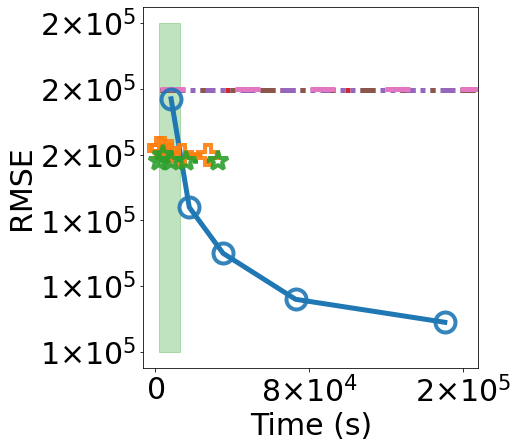

In [35]:

posterior_x = np.array([8220.7, 17650.5, 35195, 72831.2, 150360.1])
posterior_y = np.array([1.77e5, 1.44e5, 1.30e5, 1.16e5, 1.09e5])

nsp_x = np.array([1733.8, 3413.5, 7060.4, 13851.2, 27424.8])
nsp_y = np.array([1.62e5, 1.62e5, 1.61e5, 1.6e5, 1.6e5])

attn_x = np.array([2136.1, 4172.3, 8271, 16074.7, 32830.6])
attn_y = np.array([1.58e5, 1.6e5, 1.58e5, 1.58e5, 1.58e5])
f, ax = plt.subplots()
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC", ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP", ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP", ls=":", lw=line_width)
# ax.axhline(y=0.6, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="SOTA")
ax.axhline(y=179759.4, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="THP", lw=line_width)
ax.axhline(y=179761.6, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), label="SAHP", lw=line_width)
ax.axhline(y=179773.3, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), label="NHP", lw=line_width)
ax.axhline(y=1.79958e5, xmin=0.05, color='C6', ls=(0, (5,10)), label="MTPP", lw=line_width)

marker_style_id = 0
ax.plot(posterior_x, posterior_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(nsp_x, nsp_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(attn_x, attn_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax_xlim = ax.get_xlim()
ax.plot(np.arange(5) * (ax_xlim[1]-0.05)/4 + 2000, [179759.4] * 5, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 8000, [179761.6] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 14000, [179773.3] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 20000, [1.79958e5] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
# zoom-in / limit the view to different portions of the data
# ---------------------------------------------------------------------
ax.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))

# ----------------------------------------------------------------------
ax.set_ylabel('RMSE', fontsize=30)
ax.set_xlabel('Time (s)', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
# ax.set_xlim(, 60000)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 80000))
ax.fill_betweenx(y=np.linspace(1e5,2e5,50),x1=2136,x2=13000,color='C2',alpha=fill_between_alpha)
# ax.legend()

# plt.show()
plt.savefig('2-hidden-homicide-rmse.pdf',  **savefigarg)
plt.savefig('2-hidden-homicide-rmse.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('2-hidden-homicide-rmse.png').convert('CMYK').save('2-hidden-homicide-rmse-cmyk.pdf')


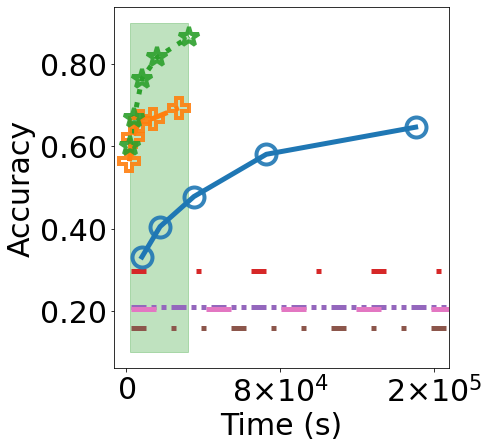

In [36]:

posterior_x = np.array([8220.7, 17650.5, 35195, 72831.2, 150360.1])
posterior_y = np.array([0.331, 0.405, 0.478, 0.581, 0.647])

nsp_x = np.array([1733.8, 3413.5, 7060.4, 13851.2, 27424.8])
nsp_y = np.array([0.564, 0.624, 0.663, 0.668, 0.694])

attn_x = np.array([2136.1, 4172.3, 8271, 16074.7, 32830.6])
attn_y = np.array([0.600, 0.669, 0.765, 0.817, 0.867])

f, ax = plt.subplots()
f.set_size_inches(figwidth,figheight)

# plot the same data on both axes
ax.plot(posterior_x, posterior_y, label="DNSP-MCMC", ls='-', lw=line_width)
ax.plot(nsp_x, nsp_y, label="DNSP-UNSP", ls='--', lw=line_width)
ax.plot(attn_x, attn_y, label="DNSP-USAP", ls=":", lw=line_width)
# ax.axhline(y=0.6, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="SOTA")
ax.axhline(y=0.296, xmin=0.05, color='C3', ls=(0, (3,10,1, 10)), label="THP", lw=line_width)
ax.axhline(y=0.210, xmin=0.05, color='C4', ls=(0, (3,1,1,1,1,1)), label="SAHP", lw=line_width)
ax.axhline(y=0.157, xmin=0.05, color='C5', ls=(0, (3,5,1,5,1,5)), label="NHP", lw=line_width)
ax.axhline(y=0.205, xmin=0.05, color='C6', ls=(0, (5,10)), label="MTPP", lw=line_width)

marker_style_id = 0
ax.plot(posterior_x, posterior_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(nsp_x, nsp_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax.plot(attn_x, attn_y, marker=markers[marker_style_id][0], **marker_style, color=colors_lst[marker_style_id])
marker_style_id += 1
ax_xlim = ax.get_xlim()
ax.plot(np.arange(5) * (ax_xlim[1]-0.05)/4 + 2000, [0.296] * 5, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 8000, [0.210] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 14000, [0.157] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
marker_style_id += 1
ax.plot(np.arange(4) * (ax_xlim[1]-0.05)/4 + 20000, [0.205] * 4, color=colors_lst[marker_style_id], marker=markers[marker_style_id][0], **marker_style)
# zoom-in / limit the view to different portions of the data
# --------------------------------------------------------------------
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# ----------------------------------------------------------------------

# ----------------------------------------------------------------------
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Time (s)', fontsize=30)
# ax.set_xlim(, 60000)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 80000))
ax.fill_betweenx(y=np.linspace(0.1,0.9,50),x1=2000,x2=32000,color='C2',alpha=fill_between_alpha)
ax.tick_params(axis='both', labelsize=30)
# ax.legend()

# plt.show()
plt.savefig('2-hidden-homicide-accuracy.pdf',  **savefigarg)
plt.savefig('2-hidden-homicide-accuracy.png',  dpi=300, **savefigarg)
from PIL import Image

# Open image, convert to CMYK and save as TIF
Image.open('2-hidden-homicide-accuracy.png').convert('CMYK').save('2-hidden-homicide-accuracy-cmyk.pdf')
